#<center>**Extração de Atributos e k-NN com k-fold**</center>

<b>Autora:</b> Maria Eline Silva de Farias- 516229

<b>Resumo:</b>
  Classificação de sinais de movimentos de mão.A base de dados formada pelos arquivos InputData.mat e OutputData.mat corresponde a sinais obtidos através de uma luva sensorial que contém 3 acelerômetros. A base de dados possui 2 classes, referentes a dois tipos de movimentos de mão: “abrir a mão” (classe -1) e “mão para baixo” (classe +1).



<b>Datasets URL : </b>

* https://drive.google.com/file/d/14w2PbMuKcfpOlVee8wAamUl1VIcR16aj/view?usp=share_link
* https://drive.google.com/file/d/16-BibUyqxgMdsk4gpJ1S0TI13Nc_YNu7/view?usp=share_link

<b>Descrição:</b>

Este projeto é realizado para  a disciplina Tópicos Especiais em Telecomunicações I (Reconhecimento de Padrões).

##Importando Bibliotecas

In [791]:
import pandas as pd               
import numpy as np
import os  
import seaborn as sns
import matplotlib.pyplot as plt
from cycler import cycler
from scipy.stats.mstats import gmean,hmean
from scipy import stats
import math
from scipy.stats import kurtosis, skew
import scipy as sp
from scipy import signal
from scipy.fft import fft, fftfreq
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import csv
import math
import plotly.express as px
%matplotlib inline

##Carregando a Base de Dados

In [792]:
# carregando dataset inputData
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/trabalho02/data/InputData.csv",header=None)
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/trabalho02/data/Output.csv",header=None)

In [793]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 120 entries, 0 to 119
dtypes: int64(120)
memory usage: 1.4 MB


,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,-2568,-1864,2692,-700,180,1516,992,3272,3740,1980,...,8360,14692,13120,17788,12544,11560,16540,10592,10256,9228
1,-2060,-1984,1464,-1364,-60,1112,980,2464,2704,2456,...,9868,15588,16428,20044,13044,10468,15416,10208,10984,9344
2,-2216,-1776,-108,-1900,-504,2456,500,1456,1756,2308,...,12068,17488,16416,20148,13504,10564,15264,10012,11632,9668
3,-2352,-1928,-1812,-2340,-548,2872,-208,1968,1736,1904,...,18920,18604,15400,19412,15472,10572,16504,10068,12308,9152
4,-1436,-3044,-2060,-1752,-560,2544,-676,1884,1656,1508,...,21100,18916,16860,18936,16072,10740,16576,10580,15328,9420
5,-212,-3680,-1620,-1024,-764,2452,-192,2008,1428,956,...,20284,19036,15744,16320,14588,10940,15940,11048,16956,10440
6,2224,-3588,152,-1224,-888,1076,1132,3616,2812,400,...,17128,18732,11820,12476,14492,11216,16316,11040,18476,11620
7,4044,-3032,3328,-1072,-756,640,2436,7464,3456,900,...,14556,15804,8228,10756,17532,11700,15528,10904,17184,13096
8,7696,-1848,7164,888,-212,540,2636,9772,2272,1072,...,10320,10148,2792,9144,17920,12592,12780,11040,13536,12832
9,10672,508,10720,4720,460,4264,3036,14920,1588,1556,...,1968,7452,628,6268,14220,13552,11036,11288,11496,11388


In [794]:
df.tail(1)

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
1499,15248,13512,14044,14656,13132,12548,12304,12664,12008,12816,...,12188,15500,14608,12048,12868,11988,14724,16092,15440,17100


In [795]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,6103.909333,6811.233333,6941.961333,6983.905333,6984.618667,7011.710000,7374.313333,7090.589333,7172.436000,7263.146000,...,7030.565333,7452.519333,8028.402667,7981.682667,8190.560667,7947.288000,7590.045333,7532.064000,7260.656000,6439.808000
std,8460.065853,7967.739527,8037.116647,7961.734889,7649.528794,7866.847225,7356.242144,8003.772589,7621.604789,7543.915819,...,8178.140732,7945.790624,7095.619665,7152.892815,6924.013170,7123.911432,7625.368436,8231.812109,8131.967683,8805.980186
min,-25016.000000,-30700.000000,-31788.000000,-23280.000000,-15788.000000,-25752.000000,-17464.000000,-30256.000000,-18980.000000,-20328.000000,...,-28824.000000,-22044.000000,-14472.000000,-12496.000000,-16460.000000,-11352.000000,-13052.000000,-31840.000000,-25616.000000,-16412.000000
25%,-1304.000000,392.000000,284.000000,508.000000,848.000000,536.000000,1834.000000,1231.000000,1427.000000,1595.000000,...,57.000000,3836.000000,5135.000000,6083.000000,5596.000000,5675.000000,4242.000000,3572.000000,3500.000000,-32.000000
50%,10340.000000,10902.000000,10476.000000,10038.000000,10976.000000,10668.000000,11588.000000,11420.000000,11708.000000,11396.000000,...,9414.000000,7630.000000,9252.000000,11194.000000,10668.000000,11352.000000,9600.000000,7960.000000,8760.000000,7140.000000
75%,13166.000000,13097.000000,13537.000000,13952.000000,13080.000000,13017.000000,12257.000000,12660.000000,12232.000000,12560.000000,...,12575.000000,15458.000000,14221.000000,12109.000000,12651.000000,12065.000000,14172.000000,15669.000000,15144.000000,16328.000000
max,31140.000000,32767.000000,32767.000000,32767.000000,26208.000000,32767.000000,32767.000000,32767.000000,32767.000000,32767.000000,...,32767.000000,32767.000000,25640.000000,27904.000000,32767.000000,29468.000000,31224.000000,32767.000000,32767.000000,31736.000000


##Visualizando as amostras

Text(0.5, 1.0, 'Accelerometers Signals')

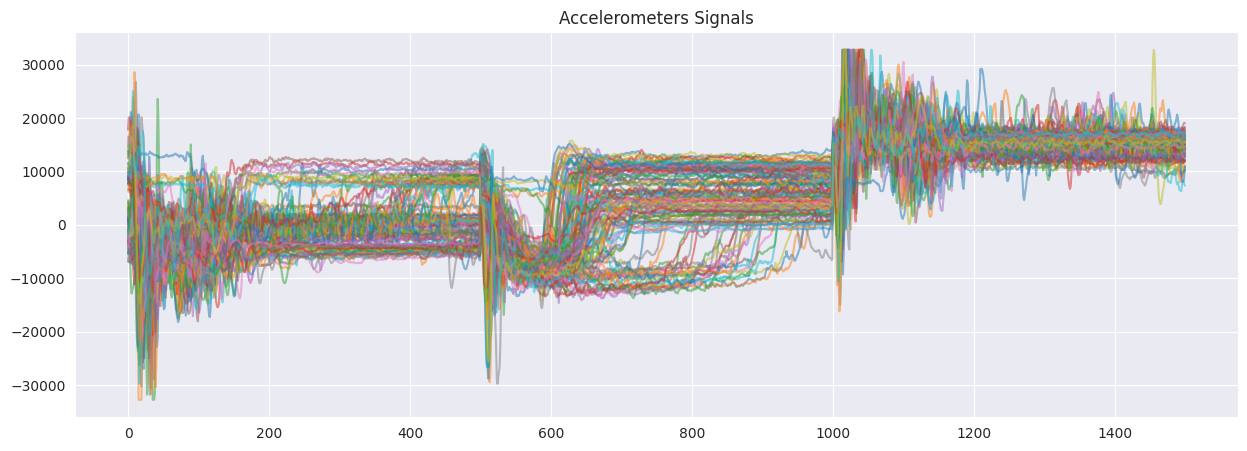

In [796]:
fig, axes = plt.subplots(1, figsize=(15, 5)) #figsize is width, height
axes.plot(df, alpha=0.5)
axes.set_title("Accelerometers Signals")

##Extraindo atributos de cada amostra

In [797]:
features = pd.DataFrame()
for column in df:
    ## TIME DOMAIN ##
    features['Min'] = np.min(df)              
    features['Max'] = np.max(df)
    features['Mean'] = np.mean(df)
    features['Rms'] = np.sqrt(np.mean(df**2)) #raiz quadrada média
    features['Var'] = np.var(df)              #varianacia
    features['Std'] = np.std(df)              # desvio padrão
    features['Peak'] = np.max(np.abs(df))     # Pico
    features['P2p'] = np.ptp(df)              # Intervalo de valores
    features['CrestFactor'] = np.max(np.abs(df))/np.sqrt(np.mean(df**2))  #Fator de Crista
    features['Skew'] = stats.skew(df)                           #assimetria
    features['Kurtosis'] = stats.kurtosis(df,fisher=False)
    features['FormFactor'] = np.sqrt(np.mean(df**2))/np.mean(df)    #Raiz quarada media/X 
    features['PulseIndicator'] = np.max(np.abs(df))/np.mean(df)
    ## FREQ DOMAIN ##
    ft = fft(df)
    S = np.abs(ft**2)/len(df)
    features['Max_f'] = np.max(S)
    features['Sum_f'] = np.sum(S)
    features['Mean_f'] = np.mean(S)
    features ['Var_f'] = np.var(S)
    features ['Peak_f'] = np.max(np.abs(S))        #Pico da frequência

features.head(10)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumer

,Min,Max,Mean,Rms,Var,Std,Peak,P2p,CrestFactor,Skew,Kurtosis,FormFactor,PulseIndicator,Max_f,Sum_f,Mean_f,Var_f,Peak_f
0,-25016,31140,6103.909333,10429.894930,7.152500e+07,8457.245361,31140,56156,2.985648,-0.579307,2.593022,1.708724,5.101649,3.594697e+09,1.590059e+12,8.833662e+06,1.458303e+16,3.594697e+09
1,-30700,32767,6811.233333,10480.240906,6.344255e+07,7965.083171,32767,63467,3.126550,-0.762551,3.538132,1.538670,4.810729,3.594697e+09,1.590059e+12,8.833662e+06,1.458303e+16,3.594697e+09
2,-31788,32767,6941.961333,10618.051029,6.455218e+07,8034.437162,32767,64555,3.085971,-0.694613,3.435972,1.529546,4.720136,3.594697e+09,1.590059e+12,8.833662e+06,1.458303e+16,3.594697e+09
3,-23280,32767,6983.905333,10588.762755,6.334696e+07,7959.080535,32767,56047,3.094507,-0.453732,2.904674,1.516166,4.691788,3.594697e+09,1.590059e+12,8.833662e+06,1.458303e+16,3.594697e+09
4,-15788,26208,6984.618667,10356.697277,5.847628e+07,7646.978526,26208,41996,2.530536,-0.507305,2.356033,1.482786,3.752245,3.594697e+09,1.590059e+12,8.833662e+06,1.458303e+16,3.594697e+09
5,-25752,32767,7011.710000,10536.133266,6.184603e+07,7864.224505,32767,58519,3.109964,-0.604869,3.082292,1.502648,4.673182,3.594697e+09,1.590059e+12,8.833662e+06,1.458303e+16,3.594697e+09
6,-17464,32767,7374.313333,10414.351608,5.407822e+07,7353.789655,32767,50231,3.146331,-0.596851,3.332950,1.412247,4.443397,3.594697e+09,1.590059e+12,8.833662e+06,1.458303e+16,3.594697e+09
7,-30256,32767,7090.589333,10690.843083,6.401767e+07,8001.104220,32767,63023,3.064959,-0.843854,4.099247,1.507751,4.621196,3.594697e+09,1.590059e+12,8.833662e+06,1.458303e+16,3.594697e+09
8,-18980,32767,7172.436000,10463.936727,5.805013e+07,7619.063830,32767,51747,3.131422,-0.707880,3.516448,1.458910,4.568462,3.594697e+09,1.590059e+12,8.833662e+06,1.458303e+16,3.594697e+09
9,-20328,32767,7263.146000,10470.244279,5.687273e+07,7541.400761,32767,53095,3.129535,-0.608841,3.435511,1.441558,4.511406,3.594697e+09,1.590059e+12,8.833662e+06,1.458303e+16,3.594697e+09


In [798]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Min             120 non-null    int64  
 1   Max             120 non-null    int64  
 2   Mean            120 non-null    float64
 3   Rms             120 non-null    float64
 4   Var             120 non-null    float64
 5   Std             120 non-null    float64
 6   Peak            120 non-null    int64  
 7   P2p             120 non-null    int64  
 8   CrestFactor     120 non-null    float64
 9   Skew            120 non-null    float64
 10  Kurtosis        120 non-null    float64
 11  FormFactor      120 non-null    float64
 12  PulseIndicator  120 non-null    float64
 13  Max_f           120 non-null    float64
 14  Sum_f           120 non-null    float64
 15  Mean_f          120 non-null    float64
 16  Var_f           120 non-null    float64
 17  Peak_f          120 non-null    flo

##Salvando o dataFrame com as features em um arquivo csv

In [799]:
os.makedirs('/content/drive/MyDrive/Colab Notebooks/trabalho02/data', exist_ok=True)  
features.to_csv('/content/drive/MyDrive/Colab Notebooks/trabalho02/data/Datafeatures.csv')  

##Normalizando as features
O método z-score transforma as informações em distribuição com uma média 0 e um desvio típico de 1.

In [800]:
normalizedFeatures = features.copy() 
for column in normalizedFeatures.columns: 
    normalizedFeatures[column] = (normalizedFeatures[column] -
                           normalizedFeatures[column].mean()) / normalizedFeatures[column].std()     
display(normalizedFeatures)

,Min,Max,Mean,Rms,Var,Std,Peak,P2p,CrestFactor,Skew,Kurtosis,FormFactor,PulseIndicator,Max_f,Sum_f,Mean_f,Var_f,Peak_f
0,-1.253568,0.814982,0.381460,-0.427030,-0.416337,-0.369484,0.814975,1.172228,0.915287,-1.006176,0.367010,-0.523508,-0.027938,NaN,0.995825,-0.995825,NaN,NaN
1,-2.131239,1.168985,0.883645,-0.146769,-0.982731,-0.964506,1.168976,1.894591,1.253368,-1.437623,1.550546,-0.796213,-0.289402,NaN,0.995825,-0.995825,NaN,NaN
2,-2.299237,1.168985,0.976459,0.620381,-0.904971,-0.880657,1.168976,2.002091,1.156002,-1.277663,1.422614,-0.810844,-0.370824,NaN,0.995825,-0.995825,NaN,NaN
3,-0.985511,1.168985,1.006239,0.457342,-0.989430,-0.971763,1.168976,1.161458,1.176483,-0.710512,0.757284,-0.832301,-0.396302,NaN,0.995825,-0.995825,NaN,NaN
4,0.171334,-0.258125,1.006745,-0.834501,-1.330753,-1.349092,-0.258127,-0.226850,-0.176713,-0.836648,0.070235,-0.885830,-1.240719,NaN,0.995825,-0.995825,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.856300,0.451187,1.690220,0.916548,-1.874550,-1.984349,0.451182,-0.343045,0.377313,-1.721390,1.890071,-1.110392,-1.280546,NaN,0.995825,-0.995825,NaN,NaN
116,0.593802,0.833259,1.436586,1.394703,-1.356597,-1.378292,0.833251,-0.001575,0.716086,-1.092492,0.976990,-0.990894,-0.915762,NaN,0.995825,-0.995825,NaN,NaN
117,-2.307267,1.168985,1.395420,3.613296,-0.683151,-0.645350,1.168976,2.007229,0.799145,-1.234199,2.891464,-0.888544,-0.703184,NaN,0.995825,-0.995825,NaN,NaN
118,-1.346214,1.168985,1.202726,2.187852,-0.797569,-0.766021,1.168976,1.392266,0.964715,-0.892645,1.186389,-0.856316,-0.557030,NaN,0.995825,-0.995825,NaN,NaN



##Salvando dataFrame das features Normalizado em um arquivo csv

In [801]:
os.makedirs('/content/drive/MyDrive/Colab Notebooks/trabalho02/data', exist_ok=True)  
normalizedFeatures.to_csv('/content/drive/MyDrive/Colab Notebooks/trabalho02/data/DatanormalizedFeatures.csv')  

##Anexando a base de dados output.csv com a DatanormalizedFeatures.csv e criando um novo dataFrame

In [802]:
dataGraficos = pd.DataFrame()
dataGraficos =  normalizedFeatures.join(df2)
dataGraficos.columns= ['Min', 'Max','Mean','Rms','Var','Std','Peak','P2p','CrestFactor','Skew','Kurtosis','FormFactor','PulseIndicator',
                        'Max_f','Sum_f','Mean_f','Var_f','Peak_f','Classes']
dataGraficos.head(10)

,Min,Max,Mean,Rms,Var,Std,Peak,P2p,CrestFactor,Skew,Kurtosis,FormFactor,PulseIndicator,Max_f,Sum_f,Mean_f,Var_f,Peak_f,Classes
0,-1.253568,0.814982,0.381460,-0.427030,-0.416337,-0.369484,0.814975,1.172228,0.915287,-1.006176,0.367010,-0.523508,-0.027938,NaN,0.995825,-0.995825,NaN,NaN,-1
1,-2.131239,1.168985,0.883645,-0.146769,-0.982731,-0.964506,1.168976,1.894591,1.253368,-1.437623,1.550546,-0.796213,-0.289402,NaN,0.995825,-0.995825,NaN,NaN,-1
2,-2.299237,1.168985,0.976459,0.620381,-0.904971,-0.880657,1.168976,2.002091,1.156002,-1.277663,1.422614,-0.810844,-0.370824,NaN,0.995825,-0.995825,NaN,NaN,-1
3,-0.985511,1.168985,1.006239,0.457342,-0.989430,-0.971763,1.168976,1.161458,1.176483,-0.710512,0.757284,-0.832301,-0.396302,NaN,0.995825,-0.995825,NaN,NaN,-1
4,0.171334,-0.258125,1.006745,-0.834501,-1.330753,-1.349092,-0.258127,-0.226850,-0.176713,-0.836648,0.070235,-0.885830,-1.240719,NaN,0.995825,-0.995825,NaN,NaN,-1
5,-1.367214,1.168985,1.025979,0.164368,-1.094611,-1.086443,1.168976,1.405704,1.213571,-1.066361,0.979709,-0.853979,-0.413023,NaN,0.995825,-0.995825,NaN,NaN,-1
6,-0.087458,1.168985,1.283420,-0.513556,-1.638955,-1.703556,1.168976,0.586808,1.300830,-1.047484,1.293601,-0.998950,-0.619544,NaN,0.995825,-0.995825,NaN,NaN,-1
7,-2.062680,1.168985,1.081982,1.025594,-0.942428,-0.920956,1.168976,1.850722,1.105586,-1.629048,2.253215,-0.845796,-0.459746,NaN,0.995825,-0.995825,NaN,NaN,-1
8,-0.321545,1.168985,1.140092,-0.237529,-1.360616,-1.382841,1.168976,0.736597,1.265056,-1.308900,1.523391,-0.924120,-0.507141,NaN,0.995825,-0.995825,NaN,NaN,-1
9,-0.529691,1.168985,1.204494,-0.202417,-1.443125,-1.476735,1.168976,0.869786,1.260530,-1.075713,1.422036,-0.951946,-0.558420,NaN,0.995825,-0.995825,NaN,NaN,-1


Nota: Normalizando os dados os atributos max_f var_f e peak_f assumem valores NAN

In [803]:
os.makedirs('/content/drive/MyDrive/Colab Notebooks/trabalho02/data', exist_ok=True)  
dataGraficos.to_csv('/content/drive/MyDrive/Colab Notebooks/trabalho02/data/DataGraficos.csv')  

In [804]:
dataGraficos.info()
dataGraficos.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Min             120 non-null    float64
 1   Max             120 non-null    float64
 2   Mean            120 non-null    float64
 3   Rms             120 non-null    float64
 4   Var             120 non-null    float64
 5   Std             120 non-null    float64
 6   Peak            120 non-null    float64
 7   P2p             120 non-null    float64
 8   CrestFactor     120 non-null    float64
 9   Skew            120 non-null    float64
 10  Kurtosis        120 non-null    float64
 11  FormFactor      120 non-null    float64
 12  PulseIndicator  120 non-null    float64
 13  Max_f           0 non-null      float64
 14  Sum_f           120 non-null    float64
 15  Mean_f          120 non-null    float64
 16  Var_f           0 non-null      float64
 17  Peak_f          0 non-null      flo

,Min,Max,Mean,Rms,Var,Std,Peak,P2p,CrestFactor,Skew,Kurtosis,FormFactor,PulseIndicator,Max_f,Sum_f,Mean_f,Var_f,Peak_f,Classes
0,-1.253568,0.814982,0.381460,-0.427030,-0.416337,-0.369484,0.814975,1.172228,0.915287,-1.006176,0.367010,-0.523508,-0.027938,NaN,0.995825,-0.995825,NaN,NaN,-1
1,-2.131239,1.168985,0.883645,-0.146769,-0.982731,-0.964506,1.168976,1.894591,1.253368,-1.437623,1.550546,-0.796213,-0.289402,NaN,0.995825,-0.995825,NaN,NaN,-1
2,-2.299237,1.168985,0.976459,0.620381,-0.904971,-0.880657,1.168976,2.002091,1.156002,-1.277663,1.422614,-0.810844,-0.370824,NaN,0.995825,-0.995825,NaN,NaN,-1
3,-0.985511,1.168985,1.006239,0.457342,-0.989430,-0.971763,1.168976,1.161458,1.176483,-0.710512,0.757284,-0.832301,-0.396302,NaN,0.995825,-0.995825,NaN,NaN,-1
4,0.171334,-0.258125,1.006745,-0.834501,-1.330753,-1.349092,-0.258127,-0.226850,-0.176713,-0.836648,0.070235,-0.885830,-1.240719,NaN,0.995825,-0.995825,NaN,NaN,-1
5,-1.367214,1.168985,1.025979,0.164368,-1.094611,-1.086443,1.168976,1.405704,1.213571,-1.066361,0.979709,-0.853979,-0.413023,NaN,0.995825,-0.995825,NaN,NaN,-1
6,-0.087458,1.168985,1.283420,-0.513556,-1.638955,-1.703556,1.168976,0.586808,1.300830,-1.047484,1.293601,-0.998950,-0.619544,NaN,0.995825,-0.995825,NaN,NaN,-1
7,-2.062680,1.168985,1.081982,1.025594,-0.942428,-0.920956,1.168976,1.850722,1.105586,-1.629048,2.253215,-0.845796,-0.459746,NaN,0.995825,-0.995825,NaN,NaN,-1
8,-0.321545,1.168985,1.140092,-0.237529,-1.360616,-1.382841,1.168976,0.736597,1.265056,-1.308900,1.523391,-0.924120,-0.507141,NaN,0.995825,-0.995825,NaN,NaN,-1
9,-0.529691,1.168985,1.204494,-0.202417,-1.443125,-1.476735,1.168976,0.869786,1.260530,-1.075713,1.422036,-0.951946,-0.558420,NaN,0.995825,-0.995825,NaN,NaN,-1


##Gráficos de Dispersão

<Axes: >

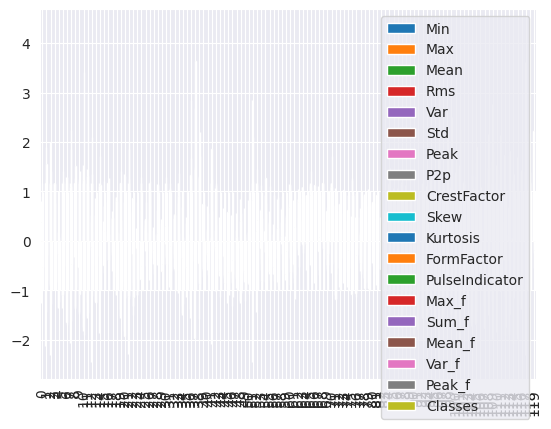

In [805]:
dataGraficos.plot(kind='bar')

In [806]:
#ax = sns.pairplot(dataGraficos)

Acima é gerado um  graficos entre todas as combinações possíveis dos atributos, só está comentado e é possível aplicar zoom com clicando em cima da figura gerada.

<ipython-input-835-be50d17fd18e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataGraficos['Min'], bins=18)


<Axes: xlabel='Min', ylabel='Density'>

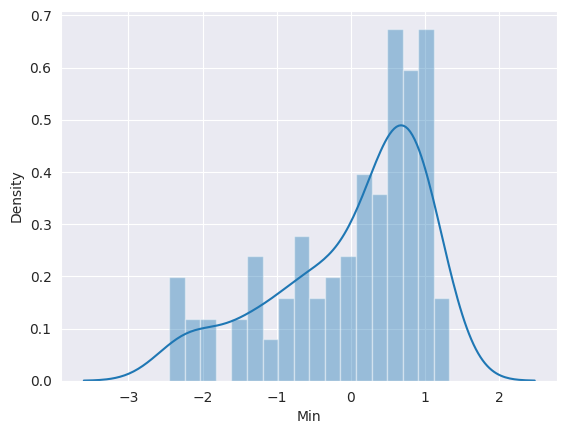

In [835]:
sns.distplot(dataGraficos['Min'], bins=18)

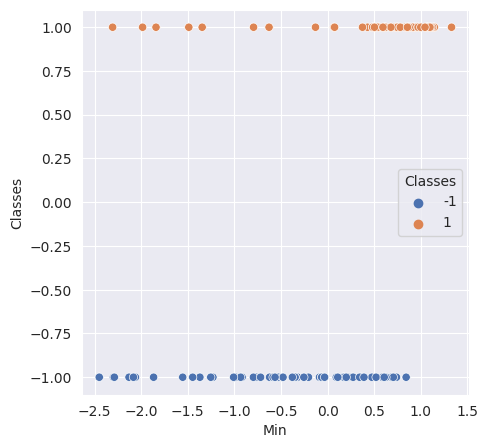

In [809]:
# Criando o ambiente do gráfico 
sns.set_style("darkgrid")
plt.figure(figsize=(5, 5))
# Gráfico de Dispersão
g1 = sns.scatterplot(x="Min", y="Classes",
                    data=dataGraficos, hue="Classes",palette="deep")

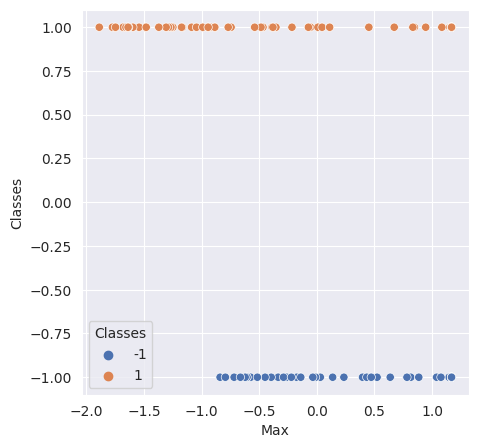

In [810]:
# Criando o ambiente do gráfico 
sns.set_style("darkgrid")
plt.figure(figsize=(5, 5))
# Gráfico de Dispersão
g1 = sns.scatterplot(x="Max", y="Classes",
                    data=dataGraficos, hue="Classes",palette="deep")

<Axes: >

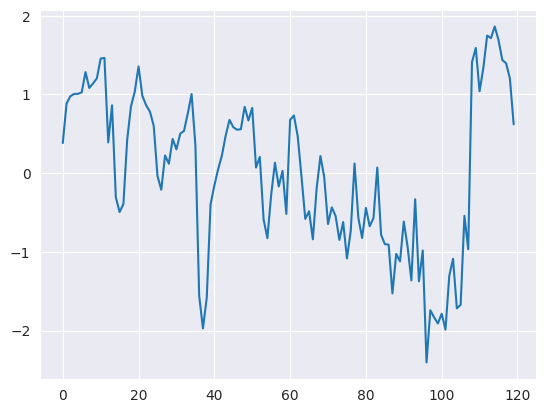

In [811]:
dataGraficos["Mean"].plot()

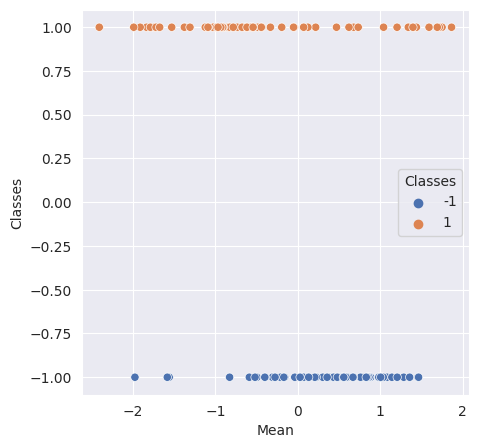

In [812]:
# Criando o ambiente do gráfico 
sns.set_style("darkgrid")
plt.figure(figsize=(5, 5))
# Gráfico de Dispersão
g1 = sns.scatterplot(x="Mean", y="Classes",
                    data=dataGraficos, hue="Classes",palette="deep")

In [813]:
#sns.kdeplot(data=dataGraficos, x="Mean") 

<ipython-input-814-571e232f44d3>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=dataGraficos, y="Mean",x="Classes", palette="deep")


<Axes: xlabel='Classes', ylabel='Mean'>

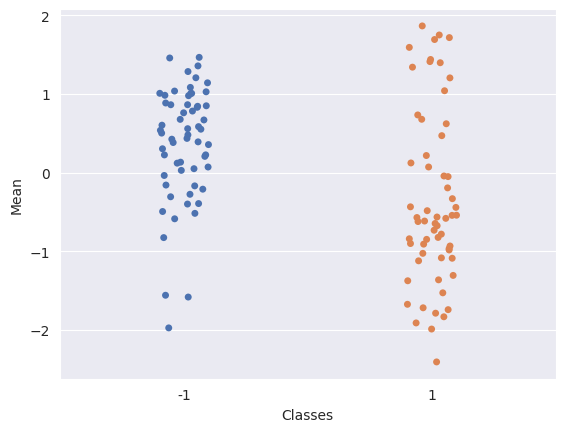

In [814]:
sns.stripplot(data=dataGraficos, y="Mean",x="Classes", palette="deep")

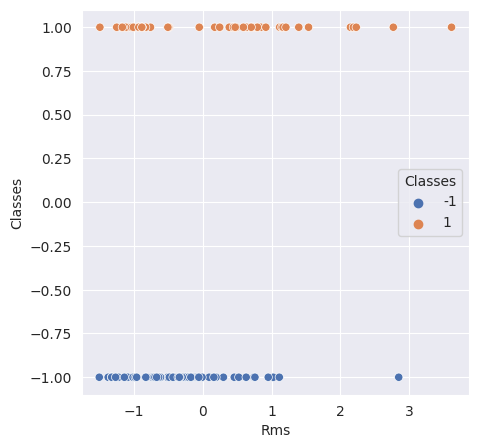

In [815]:
# Criando o ambiente do gráfico 
sns.set_style("darkgrid")
plt.figure(figsize=(5, 5))
# Gráfico de Dispersão
g1 = sns.scatterplot(x="Rms", y="Classes",
                    data=dataGraficos, hue="Classes",palette="deep")

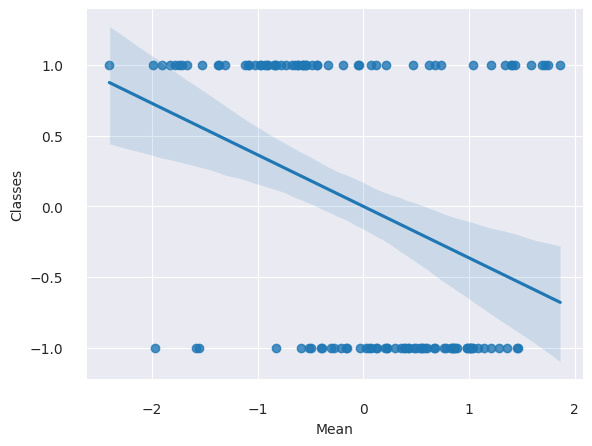

In [816]:
sns.regplot(x="Mean", 
            y="Classes", 
            data=dataGraficos);
sns.despine(offset=10, trim=True)

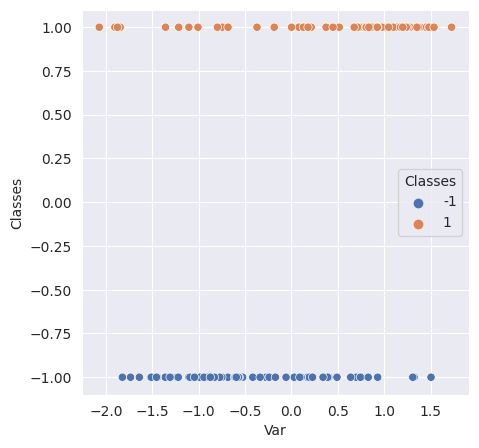

In [817]:
# Criando o ambiente do gráfico 
sns.set_style("darkgrid")
plt.figure(figsize=(5, 5))
# Gráfico de Dispersão
g1 = sns.scatterplot(x="Var", y="Classes",
                    data=dataGraficos, hue="Classes",palette="deep")

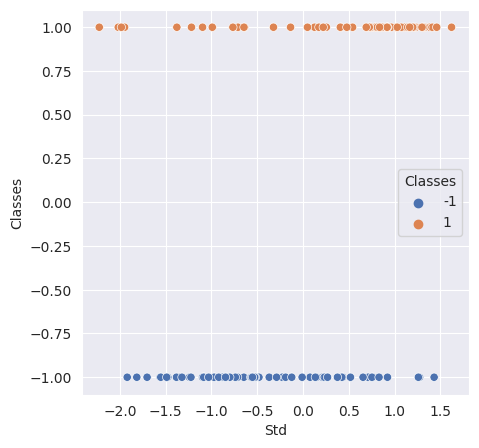

In [818]:
# Criando o ambiente do gráfico 
sns.set_style("darkgrid")
plt.figure(figsize=(5, 5))
# Gráfico de Dispersão
g1 = sns.scatterplot(x="Std", y="Classes",
                    data=dataGraficos, hue="Classes",palette="deep")

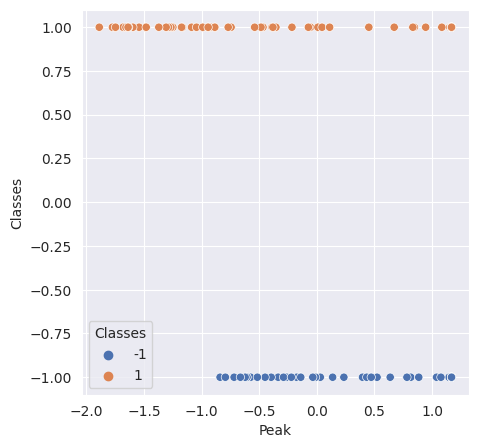

In [819]:
# Criando o ambiente do gráfico 
sns.set_style("darkgrid")
plt.figure(figsize=(5, 5))
# Gráfico de Dispersão
g1 = sns.scatterplot(x="Peak", y="Classes",
                    data=dataGraficos, hue="Classes",palette="deep")

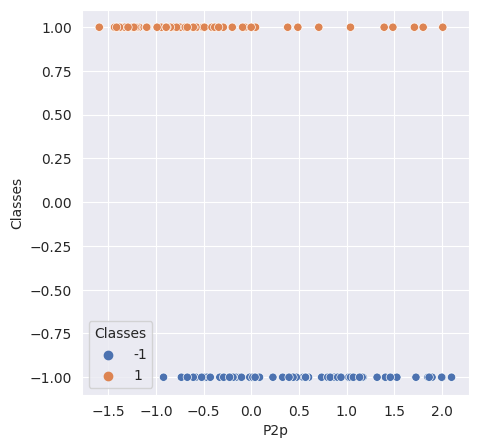

In [820]:
# Criando o ambiente do gráfico 
sns.set_style("darkgrid")
plt.figure(figsize=(5, 5))
# Gráfico de Dispersão
g1 = sns.scatterplot(x="P2p", y="Classes",
                    data=dataGraficos, hue="Classes",palette="deep")

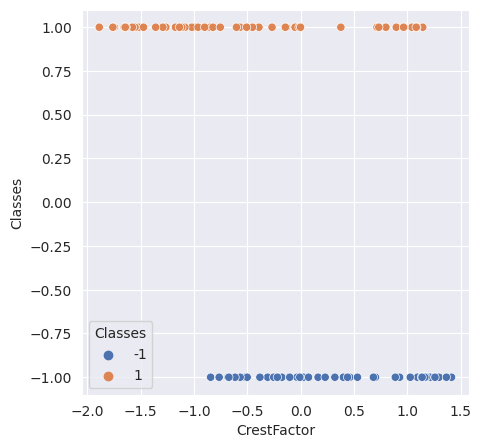

In [821]:
# Criando o ambiente do gráfico 
sns.set_style("darkgrid")
plt.figure(figsize=(5, 5))
# Gráfico de Dispersão
g1 = sns.scatterplot(x="CrestFactor", y="Classes",
                    data=dataGraficos, hue="Classes",palette="deep")

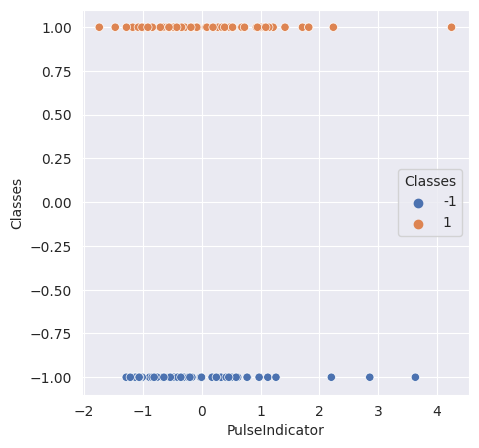

In [822]:
# Criando o ambiente do gráfico 
sns.set_style("darkgrid")
plt.figure(figsize=(5, 5))
# Gráfico de Dispersão
g1 = sns.scatterplot(x="PulseIndicator", y="Classes",
                    data=dataGraficos, hue="Classes",palette="deep")

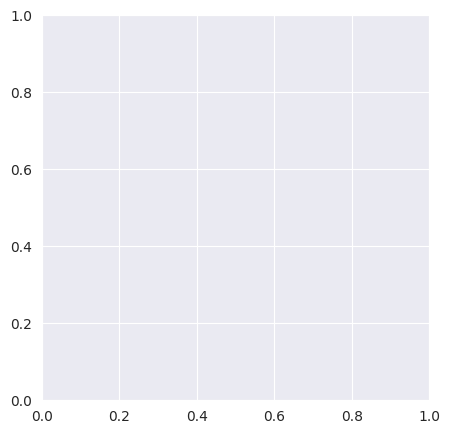

In [823]:
# Criando o ambiente do gráfico 
sns.set_style("darkgrid")
plt.figure(figsize=(5, 5))
# Gráfico de Dispersão
g1 = sns.scatterplot(x="Max_f", y="Classes",
                    data=dataGraficos, hue="Classes",palette="deep")

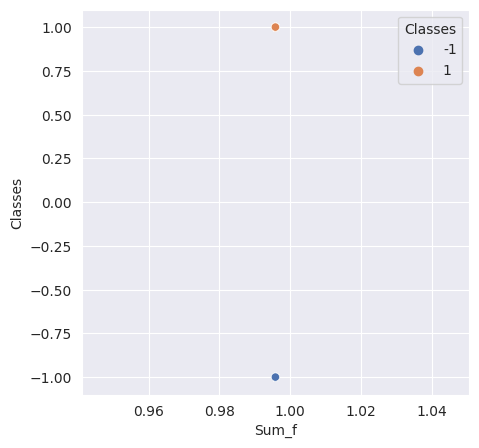

In [824]:
# Criando o ambiente do gráfico 
sns.set_style("darkgrid")
plt.figure(figsize=(5, 5))
# Gráfico de Dispersão
g1 = sns.scatterplot(x="Sum_f", y="Classes",
                    data=dataGraficos, hue="Classes",palette="deep") 
#Aqui tá normalizado

<Axes: >

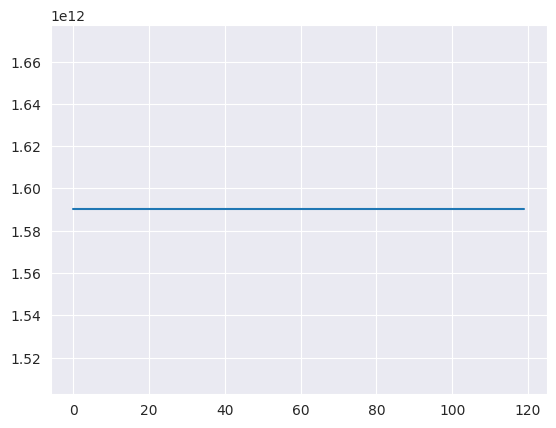

In [825]:
features["Sum_f"].plot() #Aqui não tá normalizado

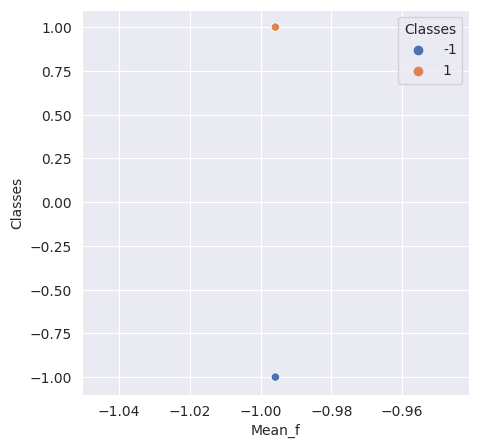

In [826]:
# Criando o ambiente do gráfico 
sns.set_style("darkgrid")
plt.figure(figsize=(5, 5))
# Gráfico de Dispersão
g1 = sns.scatterplot(x="Mean_f", y="Classes",
                    data=dataGraficos, hue="Classes",palette="deep")

<Axes: >

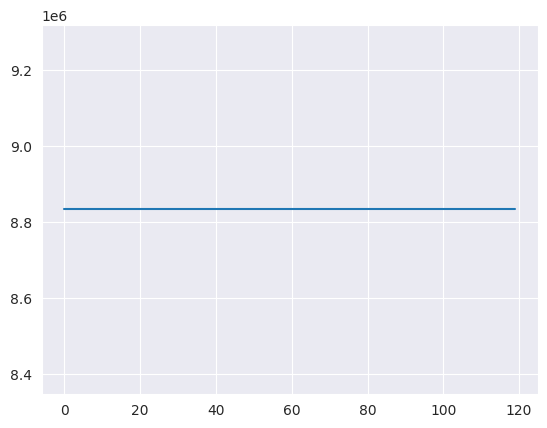

In [827]:
features["Mean_f"].plot()

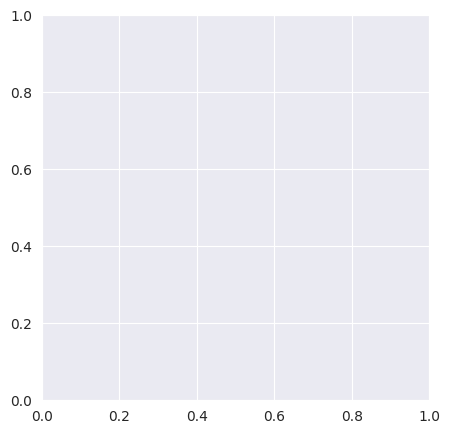

In [828]:
# Criando o ambiente do gráfico 
sns.set_style("darkgrid")
plt.figure(figsize=(5, 5))
# Gráfico de Dispersão
g1 = sns.scatterplot(x="Peak_f", y="Classes",
                    data=dataGraficos, hue="Classes",palette="deep")

<Axes: >

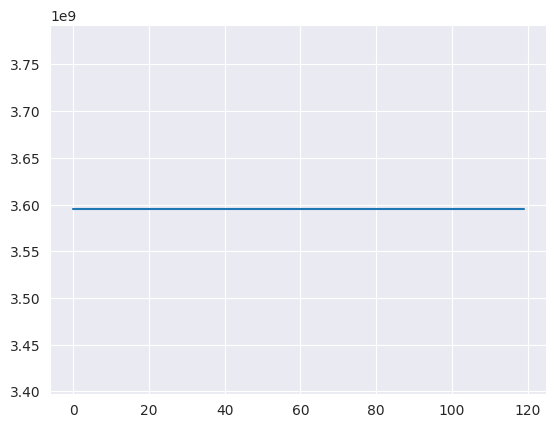

In [829]:
features["Peak_f"].plot()

Text(0.5, 1.0, 'Gráfico com os Atributos')

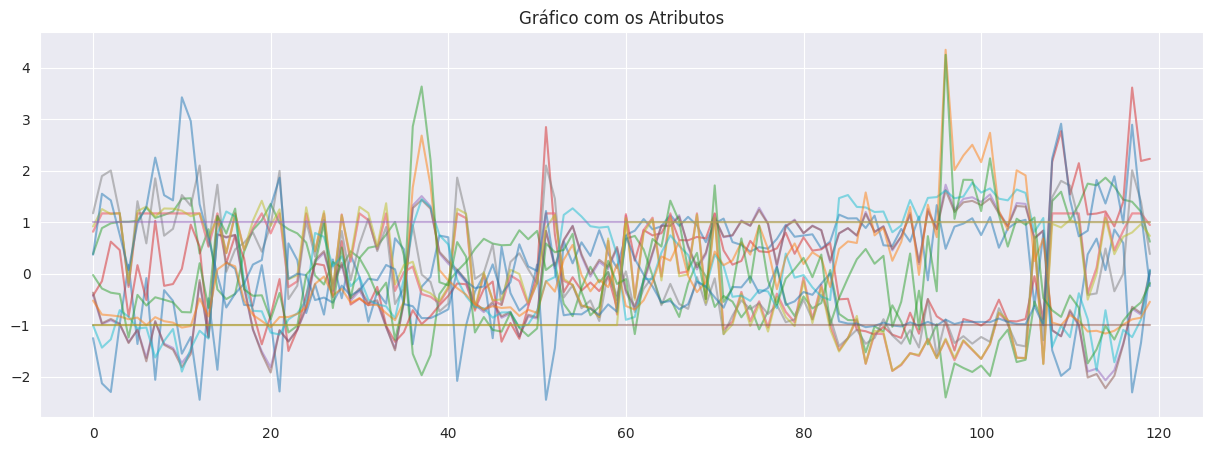

In [830]:
fig, axes = plt.subplots(1, figsize=(15, 5)) #figsize is width, height
axes.plot(dataGraficos, alpha=0.5)
axes.set_title("Gráfico com os Atributos")

##Matriz de Covariancia

<Axes: >

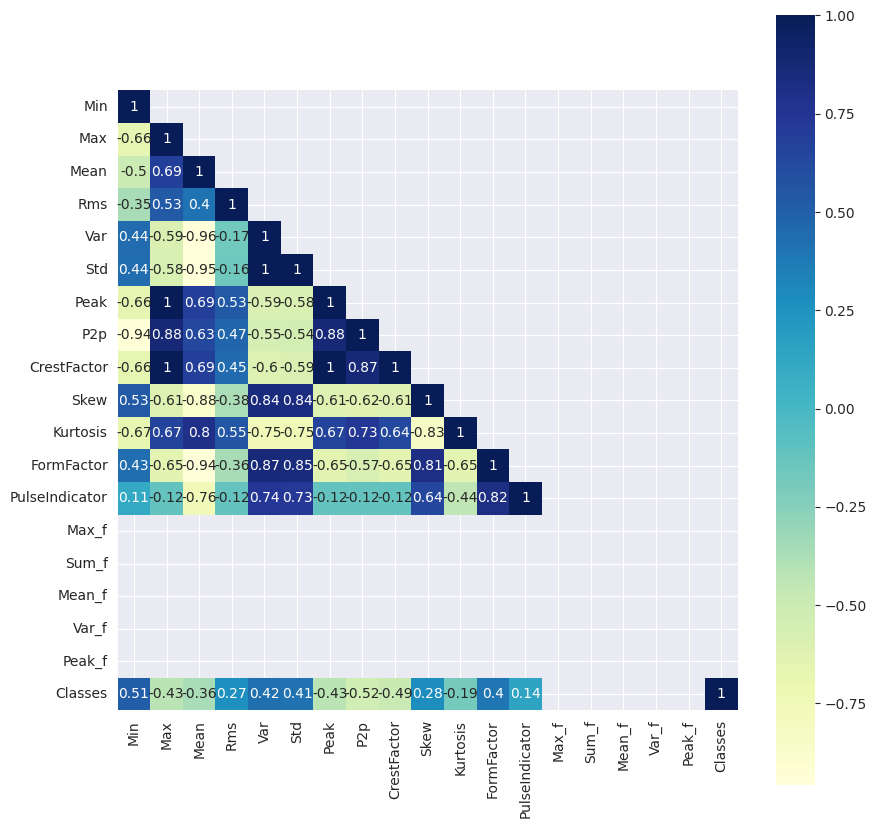

In [831]:
correlation= dataGraficos.corr()
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=mask,square=True,annot=True,cbar=True,cmap="YlGnBu")

##Excluindo atributos que possuem baixa correlação e criando novo dataFrame

Atributos Afetados pela normalização dos dados

In [832]:
dataFrameFinal = pd.DataFrame()
dataFrameFinal = dataGraficos.copy()
dataFrameFinal.drop(columns=['Max_f', 'Sum_f','Mean_f','Var_f','Peak_f'],inplace=True)
dataFrameFinal['Classes'] = dataFrameFinal['Classes'].replace([-1], 0)
dataFrameFinal.info()
dataFrameFinal.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Min             120 non-null    float64
 1   Max             120 non-null    float64
 2   Mean            120 non-null    float64
 3   Rms             120 non-null    float64
 4   Var             120 non-null    float64
 5   Std             120 non-null    float64
 6   Peak            120 non-null    float64
 7   P2p             120 non-null    float64
 8   CrestFactor     120 non-null    float64
 9   Skew            120 non-null    float64
 10  Kurtosis        120 non-null    float64
 11  FormFactor      120 non-null    float64
 12  PulseIndicator  120 non-null    float64
 13  Classes         120 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 18.1 KB


,Min,Max,Mean,Rms,Var,Std,Peak,P2p,CrestFactor,Skew,Kurtosis,FormFactor,PulseIndicator,Classes
0,-1.253568,0.814982,0.381460,-0.427030,-0.416337,-0.369484,0.814975,1.172228,0.915287,-1.006176,0.367010,-0.523508,-0.027938,0
1,-2.131239,1.168985,0.883645,-0.146769,-0.982731,-0.964506,1.168976,1.894591,1.253368,-1.437623,1.550546,-0.796213,-0.289402,0
2,-2.299237,1.168985,0.976459,0.620381,-0.904971,-0.880657,1.168976,2.002091,1.156002,-1.277663,1.422614,-0.810844,-0.370824,0
3,-0.985511,1.168985,1.006239,0.457342,-0.989430,-0.971763,1.168976,1.161458,1.176483,-0.710512,0.757284,-0.832301,-0.396302,0
4,0.171334,-0.258125,1.006745,-0.834501,-1.330753,-1.349092,-0.258127,-0.226850,-0.176713,-0.836648,0.070235,-0.885830,-1.240719,0
5,-1.367214,1.168985,1.025979,0.164368,-1.094611,-1.086443,1.168976,1.405704,1.213571,-1.066361,0.979709,-0.853979,-0.413023,0
6,-0.087458,1.168985,1.283420,-0.513556,-1.638955,-1.703556,1.168976,0.586808,1.300830,-1.047484,1.293601,-0.998950,-0.619544,0
7,-2.062680,1.168985,1.081982,1.025594,-0.942428,-0.920956,1.168976,1.850722,1.105586,-1.629048,2.253215,-0.845796,-0.459746,0
8,-0.321545,1.168985,1.140092,-0.237529,-1.360616,-1.382841,1.168976,0.736597,1.265056,-1.308900,1.523391,-0.924120,-0.507141,0
9,-0.529691,1.168985,1.204494,-0.202417,-1.443125,-1.476735,1.168976,0.869786,1.260530,-1.075713,1.422036,-0.951946,-0.558420,0


##Salvando base de dados Final

In [833]:
os.makedirs('/content/drive/MyDrive/Colab Notebooks/trabalho02/data', exist_ok=True)  
dataFrameFinal.to_csv('/content/drive/MyDrive/Colab Notebooks/trabalho02/data/dF_Final.csv') 

##Classificador KNN (k -Nearest Neighbors)
1.   Escolha um valor para k.
2.   Encontre a distância do novo ponto para cada registro de dados de treinamento. ( distância euclidiana)
3.  Obtenha os k -vizinhos mais próximos.
4.  Para o problema de classificação , o novo ponto de dados pertence à classe à qual pertence a maioria dos vizinhos.

 k = 10 é o valor k para validação cruzada k-fold, para o valor k (vizinhos) de kNN é 8 


 *Accuracy :  85 %*


In [834]:
#Function for load the data
def LoadData(File):
    with open(File) as csv_file:
        data = []
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count != 0:
                data.append([row[1],row[2],row[3],row[4],row[5],row[6],row[7],
                             row[8],row[9],row[10],row[11],row[12],row[13],row[14]])
            line_count += 1
        return data
#Load the data
File = "/content/drive/MyDrive/Colab Notebooks/trabalho02/data/dF_Final.csv"
dataTrain = LoadData(File)

#Função para calcular a distância euclidiana
#def distancia_euclidiana(data1,data2):
 #   distancia = 0.0
  #  for i in range(len(data1)-1):
   #   distancia += (float(data1[i]) - float(data2[i]))**2
   # return sqrt(distancia)

def distancia_euclidiana(data1,data2):
    result = (float(data1[0])-float(data2[0]))**2 + (float(data1[1])-float(data2[1]))**2 
    return math.sqrt(result)


#Função para implementação do k-vizinho mais próximo
def Knn(k,train,test):
    predict = []
    for i in range(0,len(test)):
        label = [0,0]                             #coloque os números 0 ou 1 como um índice no rótulo da lista
        distancia = []
        for j in range(0,len(train)):
            resultado = distancia_euclidiana(test[i],train[j])
            distancia.append([resultado,train[j][13]])
        distancia.sort()#sorting from small
        for l in range(0,k):                                  # k = 7
           if distancia[l][1] == "0":
                label[0] += 1
           elif distancia[l][1] == "1":
                label[1] += 1
        predict.append(label.index(max(label)))
    return predict

#k-foldVc com k = 10
dataTrain1 = dataTrain[0:108]
dataTest1 = dataTrain[108:120]

dataTrain2 = dataTrain[0:96]+dataTrain[108:120]
dataTest2 = dataTrain[96:108]

dataTrain3 = dataTrain[0:84]+dataTrain[96:120]
dataTest3 = dataTrain[84:96]

dataTrain4 = dataTrain[0:72]+dataTrain[72:120]
dataTest4 = dataTrain[72:84]

dataTrain5 = dataTrain[0:60]+dataTrain[60:120]
dataTest5 = dataTrain[60:72]

dataTrain6 = dataTrain[0:48]+dataTrain[48:120]
dataTest6 = dataTrain[48:60]

dataTrain7 = dataTrain[0:36]+dataTrain[36:120]
dataTest7 = dataTrain[36:48]

dataTrain8 = dataTrain[0:24]+dataTrain[24:120]
dataTest8 = dataTrain[24:36]

dataTrain9 = dataTrain[0:12]+dataTrain[12:120]
dataTest9 = dataTrain[12:24]

dataTrain10 = dataTrain[12:120]
dataTest10 = dataTrain[0:12]


#k = 8 para kNN número de vizinhos
k = 8
#faça a classificação para os demais dados divididos
predict1 = Knn(k,dataTrain1,dataTest1)
predict2 = Knn(k,dataTrain2,dataTest2)
predict3 = Knn(k,dataTrain3,dataTest3)
predict4 = Knn(k,dataTrain4,dataTest4)
predict5 = Knn(k,dataTrain5,dataTest5)
predict6 = Knn(k,dataTrain6,dataTest6)
predict7 = Knn(k,dataTrain7,dataTest7)
predict8 = Knn(k,dataTrain8,dataTest8)
predict9 = Knn(k,dataTrain9,dataTest9)
predict10 = Knn(k,dataTrain10,dataTest10)

#colete todos os resultados da classificação
predict =  predict10 + predict9 + predict8 + predict7 + predict6 + predict5 + predict4 + predict3 + predict2 + predict1

count = 0
for i in range(0,len(predict)):
    if str(predict[i]) == dataTrain[i][13]:
        count +=1
print("K :", k)
print("Accuracy : ", round(count/len(predict)*100.0),'%') #round arredonda o valor
len(predict)
#print(predict)

K : 8
Accuracy :  85 %


120